## Загрузка датасета (про рыб)

In [1]:
from load_data import load_fish, encod
import pandas as pd

In [2]:
df = load_fish()
df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [3]:
df = encod(df)
df

,species,length,weight,w_l_ratio
0,0,0.156364,0.330189,0.428571
1,0,0.020000,0.287736,0.696429
2,0,0.073455,0.332547,0.589286
3,0,0.044000,0.308962,0.642857
4,0,0.162545,0.313679,0.410714
...,...,...,...,...
4075,8,0.880000,0.959906,0.214286
4076,8,0.847273,0.957547,0.232143
4077,8,0.961818,0.990566,0.196429
4078,8,0.851636,0.957547,0.232143


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

X, y = np.array(df.drop(columns=['species'])), np.array(df.species)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Функции для визуализаций

In [5]:
# Визуализация результатов классификации
import matplotlib.pyplot as plt

def visualize_results(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_true)), y_true, label='True labels', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, label='Predicted labels', alpha=0.6)
    plt.title(title)
    plt.xlabel('Sample index')
    plt.ylabel('Class label')
    plt.legend()
    plt.show()

# График эмпирического риска
def plot_empirical_risk(k_values, empirical_risk):
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, empirical_risk)
    plt.title('График эмпирического риска в зависимости от K')
    plt.xlabel('K (число ближайших соседей)')
    plt.ylabel('Эмпирический риск')
    plt.show()

## Подбор оптимального k

100%|██████████| 110/110 [02:28<00:00,  1.35s/it]


Оптимальное число соседей: 43, Точность LOO: 0.942


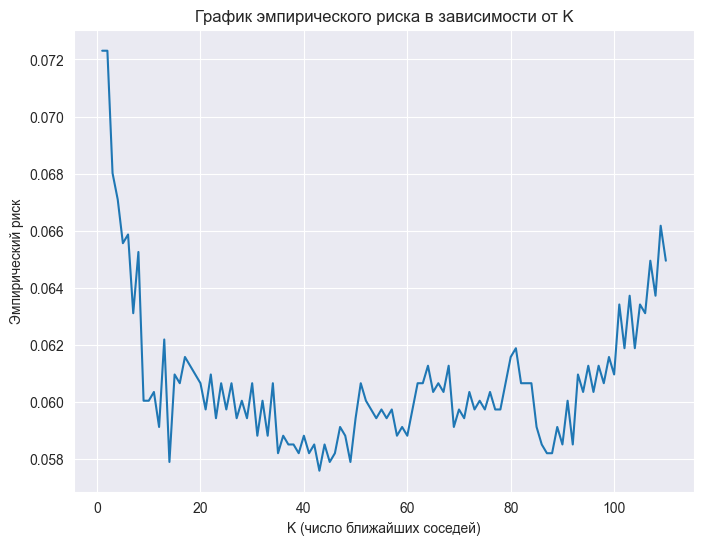

In [10]:
from KNN import KNNWithParzen
max_k = 110
parzen_window_width = 1.0
knn = KNNWithParzen(parzen_window_width)
optimal_k, loo_accuracy, empirical_risk_history = knn.loo_cross_validation(X_train, y_train, max_k=max_k)
print(f"Оптимальное число соседей: {optimal_k}, Точность LOO: {loo_accuracy:.3f}")
k_values = list(range(1, max_k + 1))
plot_empirical_risk(k_values, empirical_risk_history)


## Сравнение с эталонной

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Инициализация и обучение KNN из scikit-learn
# + Время
start_time = time.time()
knn_sklearn = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance', metric='euclidean')
knn_sklearn.fit(X_train, y_train)

# Прогноз и оценка точности
sklearn_predictions = knn_sklearn.predict(X_test)
sklearn_time = time.time() - start_time
print(f"Время выполнения эталонного KNN: {sklearn_time:.4f} секунд")
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print(f"Точность sklearn KNN: {sklearn_accuracy:.3f}")


Время выполнения эталонного KNN: 0.0190 секунд
Точность sklearn KNN: 0.940


In [8]:
# Время для своей реализации
start_time = time.time()
final_predictions = knn.predict(X_train, y_train, X_test, k=optimal_k)
my_time = time.time() - start_time
print(f"Время выполнения своего KNN: {my_time:.4f} секунд")

final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Точность на тестовой выборке: {final_accuracy:.3f}")


Время выполнения своего KNN: 0.2827 секунд
Точность на тестовой выборке: 0.936
